# GRIP AT THE SPARKS FOUNDATION

# NAME:SANSKRITI

# TASK 2-TO EXPLORE UNSUPERVISED MACHINE LEARNING

 ### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

In [4]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Elbow method

Calculating distortions which is basically the average of the squared distances from the cluster centers of the respective clusters using Euclidean distance metric and inertias which is the sum of squared distances of samples to their closest cluster center.


In [5]:
# Calculating distortions and inertias
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
K = range(1,11) 
X = iris_df.iloc[:, [0, 1, 2, 3]].values 
    
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
    
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) # using Euclidean distance metric
    inertias.append(kmeanModel.inertia_) 

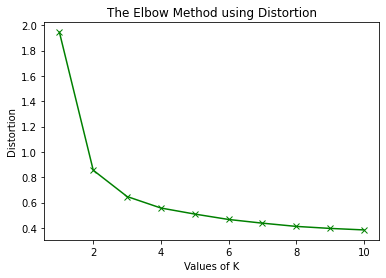

In [6]:
# Plotting Distortions VS Values of K (Elbow Method)
plt.plot(K, distortions, 'bx-', c='g') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

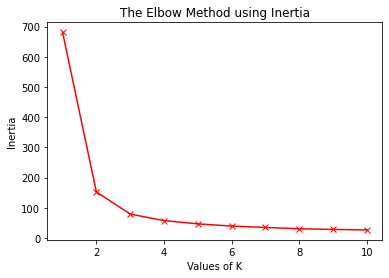

In [8]:
# Plotting Inertias VS Values of K using Elbow Method
plt.plot(K, inertias, 'bx-', c="r") 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

From the above elbow plots , we can clearly see that in both the plots the elbow occurs at "3" which means distortions and inertias now decrease with nominal change in every iteration.


In [9]:
# Applying KMeans to the iris dataframe
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

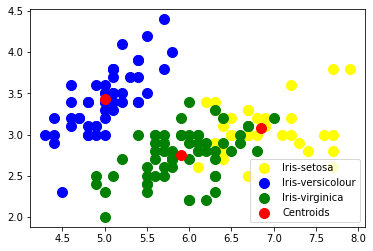

In [10]:
# Plot scatter plot using first two columns and plot the centroid of clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

Testing the algorithm

In [12]:
kmeans.labels_  #it shows particular data point belong to which cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
# It shows that the data with sepal length = 4.5 , sepal width = 3.0,
# petal length = 1.4 and petal width = 0.2 belongs to which cluster
sample_test=np.array([4.5,3.0,1.4,0.2])
test=sample_test.reshape(1, -1)
kmeans.predict(test)

array([1])